In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [63]:
X , y = load_data()

In [64]:
print(X[0])

[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01  2.78e-02 -7.06e-03
  2.35

In [65]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


dimension of variables

In [66]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


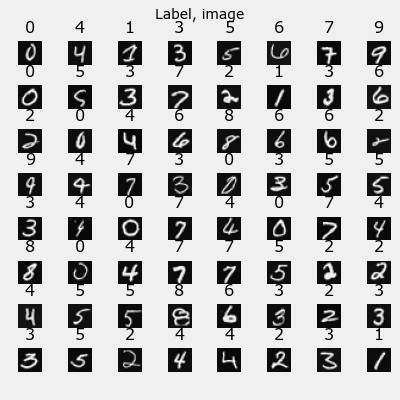

In [67]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(4,4))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=10)

In [68]:
tf.random.set_seed(1234) 
model = Sequential(
    [               
        Dense(25, activation = "relu"),
        Dense(15, activation = "relu"),
        Dense(10, activation = "linear") 
    ], name = "my_model" 
)
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
)
model.fit(
    X,y,
    epochs = 100
)

Epoch 1/100
157/157 [==============================] - 1s 862us/step - loss: 1.3945
Epoch 2/100
157/157 [==============================] - 0s 923us/step - loss: 0.5596
Epoch 3/100
157/157 [==============================] - 0s 821us/step - loss: 0.3986
Epoch 4/100
157/157 [==============================] - 0s 744us/step - loss: 0.3248
Epoch 5/100
157/157 [==============================] - 0s 846us/step - loss: 0.2879
Epoch 6/100
157/157 [==============================] - 0s 704us/step - loss: 0.2567
Epoch 7/100
157/157 [==============================] - 0s 807us/step - loss: 0.2340
Epoch 8/100
157/157 [==============================] - 0s 841us/step - loss: 0.2158
Epoch 9/100
157/157 [==============================] - 0s 1ms/step - loss: 0.2040
Epoch 10/100
157/157 [==============================] - 0s 770us/step - loss: 0.1869
Epoch 11/100
157/157 [==============================] - 0s 864us/step - loss: 0.1742
Epoch 12/100
157/157 [==============================] - 0s 802us/step - loss

In [69]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                10025     
                                                                 
 dense_13 (Dense)            (None, 15)                390       
                                                                 
 dense_14 (Dense)            (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


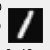

1/1 [==============================] - 0s 29ms/step
 predicting: 
[[-16.53  11.73  -4.56 -11.03  -9.37 -16.82  -8.28  -7.77  -4.73 -14.47]]
 Largest Prediction index: 1


In [70]:
display_digit(X[600])
prediction = model.predict(X[500].reshape(1,400))  
print(f" predicting: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [71]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[5.34e-13 1.00e+00 8.40e-08 1.30e-10 6.85e-10 3.97e-13 2.03e-09 3.39e-09
  7.11e-08 4.18e-12]]
Total of predictions: 1.000


In [72]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 1


1/1 [==============================] - 0s 16ms/step


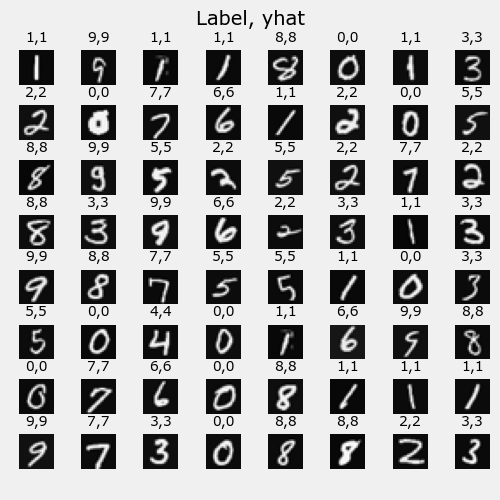

In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 
widgvis(fig)
for i,ax in enumerate(axes.flat):

    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [74]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 [==============================] - 0s 918us/step
no errors found
0 errors out of 5000 images
